In [1]:
#import modules for web scraping
from __future__ import print_function, division
import requests
from bs4 import BeautifulSoup
import pickle

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.precision', 3)

%matplotlib inline

In [ ]:
# starting to scrape ski resort data
# grab data for each relevant ski resort: total snowfall, snow days, average/max base depth, average/max summit depth,
# biggest snowfall days
# injuries per year

In [279]:
# with open('all_scraped_snow' + '.pkl', 'wb') as picklefile:
#     pickle.dump(hist_snow_states, picklefile)
with open("all_scraped_snow.pkl", 'rb') as picklefile: 
    hist_snow_states = pickle.load(picklefile)
hist_snow_states

{'colorado': {'Arapahoe Basin Ski Area': ['Biggest Snowfall:',
   'Average Summit Depth:',
   'Max Summit Depth:',
   'Average Base Depth:',
   'Max Base Depth:',
   'Total Snowfall Days:',
   'Total Snowfall:',
   '208 "',
   '64',
   '73 "',
   '42 "',
   '73 "',
   '42 "',
   '14 "',
   '305 "',
   '82',
   '78 "',
   '51 "',
   '78 "',
   '50 "',
   '16 "',
   '334 "',
   '93',
   '80 "',
   '49 "',
   '80 "',
   '49 "',
   '18 "',
   '311 "',
   '99',
   '62 "',
   '39 "',
   '62 "',
   '39 "',
   '12 "',
   '451 "',
   '123',
   '90 "',
   '53 "',
   '90 "',
   '53 "',
   '19 "'],
  'Aspen-Snowmass': ['Biggest Snowfall:',
   'Average Summit Depth:',
   'Max Summit Depth:',
   'Average Base Depth:',
   'Max Base Depth:',
   'Total Snowfall Days:',
   'Total Snowfall:',
   '233 "',
   '42',
   '52 "',
   '29 "',
   '80 "',
   '50 "',
   '16 "',
   '319 "',
   '69',
   '4545 "',
   '67 "',
   '100 "',
   '65 "',
   '19 "',
   '305 "',
   '62',
   '72 "',
   '38 "',
   '99 "',
   '59

In [5]:
#creating new copy to manipulate

from copy import deepcopy

jenn_and_ben_snow = deepcopy(hist_snow_states)

hist_snow_states_working = []
for state, resorts in jenn_and_ben_snow.items():
    for resort_name, stats_list in resorts.items():
        resort_dict = {}
        resort_dict['Resort_name'] = resort_name
        int_list = []
        key_list = []
        int_list.extend([_ for index, _ in enumerate(stats_list) if ':' not in _])
        key_list.extend([_ for index, _ in enumerate(stats_list) if ':' in _])
        key_list = key_list[::-1]
        # check if length is workable
        if len(key_list) != 7: #or len(int_list)/len(key_list) != 5:
            if len(key_list) != 0:
#                 print('{}: {}'.format(resort_name,int_list))
                pass
#         print(resort_name, int_list)
        else:    
            for index, stat in enumerate(int_list):
                resort_dict[key_list[index%len(key_list)].split(':')[0]] = resort_dict.get(key_list[index%len(key_list)].split(':')[0], 0) + int(float(stat.replace('"','').strip()))
            for key in key_list:
                resort_dict[key.split(':')[0]] /= (len(int_list)/len(key_list))
                pass
            resort_dict['State'] = state
        hist_snow_states_working.append(resort_dict)
hist_snow_states_working

[{'Resort_name': 'Arapahoe Basin Ski Area',
  'Total Snowfall': 321.8,
  'Total Snowfall Days': 92.2,
  'Max Base Depth': 76.6,
  'Average Base Depth': 46.8,
  'Max Summit Depth': 76.6,
  'Average Summit Depth': 46.6,
  'Biggest Snowfall': 15.8,
  'State': 'colorado'},
 {'Resort_name': 'Aspen-Snowmass',
  'Total Snowfall': 280.6,
  'Total Snowfall Days': 57.4,
  'Max Base Depth': 963.2,
  'Average Base Depth': 42.2,
  'Max Summit Depth': 95.6,
  'Average Summit Depth': 59.4,
  'Biggest Snowfall': 16.8,
  'State': 'colorado'},
 {'Resort_name': 'Beaver Creek',
  'Total Snowfall': 235.0,
  'Total Snowfall Days': 58.4,
  'Max Base Depth': 72.2,
  'Average Base Depth': 43.0,
  'Max Summit Depth': 72.2,
  'Average Summit Depth': 43.0,
  'Biggest Snowfall': 15.6,
  'State': 'colorado'},
 {'Resort_name': 'Breckenridge',
  'Total Snowfall': 309.6,
  'Total Snowfall Days': 70.2,
  'Max Base Depth': 87.4,
  'Average Base Depth': 52.6,
  'Max Summit Depth': 87.4,
  'Average Summit Depth': 52.6,
  

In [280]:
#checking out which rows have blanks
snow_df = pd.DataFrame(hist_snow_states_working)
check_null_df = snow_df.isnull()
resorts_incomplete_indices = list(check_null_df[check_null_df['State'] == True].index)
resorts_incomplete = list(snow_df.iloc[resorts_incomplete_indices].Resort_name)
print(len(resorts_incomplete))
resorts_incomplete

75


['Crested Butte Mountain Resort',
 'Echo Mountain',
 'Powder Mountain',
 'Big Sky Resort',
 'Blacktail Mountain Ski Area',
 'Lookout Pass Ski Area',
 'Magic Mountain Ski Area',
 'Pebble Creek Ski Area',
 'Silver Mountain',
 'Pajarito Mountain Ski Area',
 'Red River',
 'Boreal Mountain Resort',
 'Diamond Peak',
 'Donner Ski Ranch',
 'Heavenly Mountain Resort',
 'Homewood Mountain Resort',
 'Kirkwood',
 'Mt Rose Ski Tahoe',
 'Northstar California',
 'Sierra-at-Tahoe',
 'Soda Springs',
 'Squaw Valley Alpine Meadows',
 'Sugar Bowl Resort',
 'Tahoe Donner',
 'Elko SnoBowl',
 'mount-ashland',
 'mt-hood-ski-bowl',
 'Spout Springs',
 'Crystal Mountain',
 'White Pass',
 'Hickory Ski Center',
 'Bear Creek Mountain Resort',
 'Eagle Rock',
 'Roundtop Mountain Resort',
 'Spring Mountain Ski Area',
 'Mount Pleasant of Edinboro',
 'Bolton Valley',
 'Black Mountain',
 'Tenney Mountain',
 'Mt Jefferson',
 'Saddleback Inc',
 'Alpine Valley Ski Area',
 'Cannonsburg',
 'Norway Mountain',
 'shanty-creek',


In [282]:
snow_df.iloc[resorts_incomplete_indices]
#these are all nan so we should drop and add them back with correct data

,Average Base Depth,Average Summit Depth,Biggest Snowfall,Max Base Depth,Max Summit Depth,Resort_name,State,Total Snowfall,Total Snowfall Days
5,NaN,NaN,NaN,NaN,NaN,Crested Butte Mountain Resort,NaN,NaN,NaN
22,NaN,NaN,NaN,NaN,NaN,Echo Mountain,NaN,NaN,NaN
30,NaN,NaN,NaN,NaN,NaN,Powder Mountain,NaN,NaN,NaN
45,NaN,NaN,NaN,NaN,NaN,Big Sky Resort,NaN,NaN,NaN
46,NaN,NaN,NaN,NaN,NaN,Blacktail Mountain Ski Area,NaN,NaN,NaN
59,NaN,NaN,NaN,NaN,NaN,Lookout Pass Ski Area,NaN,NaN,NaN
60,NaN,NaN,NaN,NaN,NaN,Magic Mountain Ski Area,NaN,NaN,NaN
61,NaN,NaN,NaN,NaN,NaN,Pebble Creek Ski Area,NaN,NaN,NaN
64,NaN,NaN,NaN,NaN,NaN,Silver Mountain,NaN,NaN,NaN
69,NaN,NaN,NaN,NaN,NaN,Pajarito Mountain Ski Area,NaN,NaN,NaN


In [283]:
#printing out ski resorts with na
for state in hist_snow_states:
    for resort in hist_snow_states[state]:
        if resort in resorts_incomplete:
            if (state == 'california'):
                pass
            else:
                print('{} {}'.format(resort, len(hist_snow_states[state][resort])))
                print(hist_snow_states[state][resort])

Crested Butte Mountain Resort 0
[]
Echo Mountain 0
[]
Powder Mountain 21
['248 "', '55', '84 "', '58 "', '84 "', '58 "', '14 "', '112 "', '33', '65 "', '44 "', '65 "', '46 "', '11 "', '201 "', '45', '88 "', '53 "', '95 "', '59 "', '15 "']
Big Sky Resort 7
['466 "', '81', '86 "', '53 "', '129 "', '80 "', '26 "']
Blacktail Mountain Ski Area 7
['263 "', '63', '82 "', '62 "', '139 "', '95 "', '12 "']
Lookout Pass Ski Area 7
['306 "', '75', '98 "', '51 "', '151 "', '81 "', '17 "']
Magic Mountain Ski Area 7
['68 "', '14', '48 "', '34 "', '60 "', '42 "', '12 "']
Pebble Creek Ski Area 7
['149 "', '32', '40 "', '14 "', '63 "', '39 "', '14 "']
Silver Mountain 7
['187 "', '55', '80 "', '51 "', '104 "', '67 "', '14 "']
Pajarito Mountain Ski Area 21
['112 "', '24', '30 "', '20 "', '123 "', '34 "', '17 "', '65 "', '11', '34 "', '24 "', '39 "', '31 "', '15 "', '21 "', '13', '19 "', '3 "', '19 "', '3 "', '4 "']
Red River 21
['104 "', '23', '50 "', '42 "', '50 "', '41 "', '12 "', '146 "', '31', '55 "',

In [284]:
#dropping nans for now
snow_dropna_df = snow_df.dropna().reset_index().drop(columns = ['index'])
snow_dropna_df = snow_dropna_df.rename(columns = {'Resort_name' : 'Name'})
snow_dropna_df
#went from 361 resorts to 286, will rescue rescuable ones if have time

,Average Base Depth,Average Summit Depth,Biggest Snowfall,Max Base Depth,Max Summit Depth,Name,State,Total Snowfall,Total Snowfall Days
0,46.800,46.600,15.800,76.600,76.600,Arapahoe Basin Ski Area,colorado,321.800,92.200
1,42.200,59.400,16.800,963.200,95.600,Aspen-Snowmass,colorado,280.600,57.400
2,43.000,43.000,15.600,72.200,72.200,Beaver Creek,colorado,235.000,58.400
3,52.600,52.600,17.400,87.400,87.400,Breckenridge,colorado,309.600,70.200
4,45.600,55.600,15.800,74.800,133.600,Copper Mountain Resort,colorado,254.400,67.800
5,41.000,41.200,14.800,55.400,55.800,Eldora Mountain Resort,colorado,225.600,53.800
6,21.800,28.000,11.800,43.200,44.000,Howelsen Hill,colorado,112.800,38.200
7,42.200,42.200,15.200,69.000,69.000,Keystone,colorado,225.600,64.800
8,49.200,48.800,17.000,108.800,81.800,Loveland,colorado,351.600,84.600
9,58.600,58.600,17.800,87.000,87.000,Monarch Mountain,colorado,246.800,57.800


In [294]:
ski_df = pd.read_csv('skiResort.csv', encoding = 'latin-1')
ski_df.columns = [column.strip() for column in ski_df.columns]
ski_NA_df = ski_df[ski_df.Continent == 'North America']

In [295]:
# ski_USA_df = ski_USA_df['Resort Name', 'State/Province', 'Snow reliability', 'Adult', ]
ski_NA_df_test = ski_NA_df.copy()

In [296]:
# dropping useless columns
drop_columns = ['Circulating ropeway/gondola lift', 'URL', 'Continent', 'Funicular', 'Chairlift', 'T-bar lift/platter/button lift', 'Sunkid Moving Carpet', 'Currency']
ski_NA_df_test = ski_NA_df.drop(columns = drop_columns)
ski_NA_df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 822 entries, 2 to 5376
Data columns (total 35 columns):
Resort Name                                                   822 non-null object
Country                                                       822 non-null object
State/Province                                                810 non-null object
Altitude                                                      822 non-null float64
Easy                                                          680 non-null float64
Intermediate                                                  680 non-null float64
Difficult                                                     680 non-null float64
Adult                                                         822 non-null float64
Youth                                                         822 non-null float64
Child                                                         822 non-null float64
Ski resort size                                               474 n

In [297]:
#dropping columns with too much missing data
for column in ski_NA_df_test:
    if ski_NA_df_test[column].count() < 400:
        ski_NA_df_test.drop(columns = [column], inplace = True)
ski_NA_df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 822 entries, 2 to 5376
Data columns (total 13 columns):
Resort Name                        822 non-null object
Country                            822 non-null object
State/Province                     810 non-null object
Altitude                           822 non-null float64
Easy                               680 non-null float64
Intermediate                       680 non-null float64
Difficult                          680 non-null float64
Adult                              822 non-null float64
Youth                              822 non-null float64
Child                              822 non-null float64
Ski resort size                    474 non-null float64
Slope offering, variety of runs    474 non-null float64
Lifts and cable cars               474 non-null float64
dtypes: float64(10), object(3)
memory usage: 89.9+ KB


In [298]:
#cleaning up column names
for i in ski_NA_df_test:
    new_name = i.replace(' ', '_').replace(',', '').replace('/Province','')
    ski_NA_df_test.rename(columns = {i : new_name}, inplace = True)

ski_NA_df_test.rename(columns = {'Slope_offering_variety_of_runs' : 'Run_variety'}, inplace = True)
ski_NA_df_test.rename(columns = {'Lifts_and_cable_cars' : 'Lifts'}, inplace = True)
ski_NA_df_test.rename(columns = {'Ski_resort_size' : 'Resort_size'}, inplace = True)

ski_NA_df_test.replace('Western United States', 'California', inplace = True)
ski_NA_df_test.loc[ski_NA_df_test['Resort_Name'] == 'diamond-peak',['State']] = 'Nevada'

In [299]:
ski_NA_df_clean1 = ski_NA_df_test

In [300]:
ski_NA_df_clean1.dropna(subset = ['Resort_size', 'Run_variety', 'Lifts'], inplace = True)

In [301]:
ski_NA_df_clean1.dropna(subset = ['State'], inplace = True)
ski_NA_df_clean1.dropna(inplace = True)
ski_NA_df_clean1.rename(columns = {'Resort_Name' : 'Resort_name'}, inplace = True)

In [302]:
ski_NA_df_clean1.describe()

,Altitude,Easy,Intermediate,Difficult,Adult,Youth,Child,Resort_size,Run_variety,Lifts
count,469.000,469.000,469.000,469.000,469.000,469.000,469.000,469.000,469.000,469.000
mean,1276.443,6.896,12.096,9.736,56.049,21.018,34.877,2.278,2.617,2.868
std,1072.435,8.891,18.068,16.222,35.824,31.152,24.384,0.912,1.079,0.829
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000
25%,387.000,1.300,1.600,0.700,35.000,0.000,20.000,1.500,1.800,2.700
50%,781.000,4.000,4.100,3.000,51.000,0.000,32.000,2.100,2.400,3.000
75%,2210.000,8.000,15.000,10.000,74.000,40.000,49.000,2.900,3.200,3.400
max,3914.000,60.000,152.000,126.000,189.000,135.000,130.000,5.000,5.000,5.000


In [303]:
# ski_NA_df_clean1[ski_NA_df_clean1['Resort_name'] == 'brookvale-ski-park'].Adult = 25.52
# ski_NA_df_clean1[ski_NA_df_clean1['Resort_name'] == 'brookvale-ski-park'].Child = 8.
# ski_NA_df_clean1[ski_NA_df_clean1['Adult'] == 0]
# ski_NA_df_clean1.loc[ski_NA_df_clean1['Resort_name'] == 'brookvale-ski-park'].Adult = 25.52
ski_NA_df_clean1.loc[ski_NA_df_clean1['Resort_name'] == 'brookvale-ski-park', ['Adult']] = 25.52
ski_NA_df_clean1.loc[ski_NA_df_clean1['Resort_name'] == 'brookvale-ski-park', ['Child']] = 8.
# ski_NA_df_clean1 = ski_NA_df_clean1.drop(ski_NA_df_clean1.loc[ski_NA_df_clean1['Adult'] == 0])
ski_NA_df_clean1 = ski_NA_df_clean1.loc[ski_NA_df_clean1['Adult'] != 0]
ski_NA_df_clean1 = ski_NA_df_clean1.reset_index().drop(columns = 'index')
ski_NA_df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 13 columns):
Resort_name     434 non-null object
Country         434 non-null object
State           434 non-null object
Altitude        434 non-null float64
Easy            434 non-null float64
Intermediate    434 non-null float64
Difficult       434 non-null float64
Adult           434 non-null float64
Youth           434 non-null float64
Child           434 non-null float64
Resort_size     434 non-null float64
Run_variety     434 non-null float64
Lifts           434 non-null float64
dtypes: float64(10), object(3)
memory usage: 44.2+ KB


In [304]:
import patsy
make_state_dummies_df = patsy.dmatrix('State',data = ski_NA_df_clean1, return_type = 'dataframe')
make_state_dummies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 434 entries, 0 to 433
Data columns (total 43 columns):
Intercept                             434 non-null float64
State[T.Alberta]                      434 non-null float64
State[T.Arizona]                      434 non-null float64
State[T.British Columbia]             434 non-null float64
State[T.California]                   434 non-null float64
State[T.Colorado]                     434 non-null float64
State[T.Connecticut]                  434 non-null float64
State[T.Idaho]                        434 non-null float64
State[T.Illinois]                     434 non-null float64
State[T.Indiana]                      434 non-null float64
State[T.Iowa]                         434 non-null float64
State[T.Maine]                        434 non-null float64
State[T.Manitoba]                     434 non-null float64
State[T.Massachusetts]                434 non-null float64
State[T.Michigan]                     434 non-null float64
State[T.Mi

In [305]:
dummified_ski_NA_df_clean1 = pd.concat([ski_NA_df_clean1, make_state_dummies_df], axis=1)
dummified_ski_NA_df_clean1 = dummified_ski_NA_df_clean1.drop(columns = ['State','Country'])
log_adult_df = dummified_ski_NA_df_clean1[['Adult']].apply(lambda x: np.log(x))
log_adult_df.rename(columns = {'Adult': 'log_Adult'}, inplace = True)
# log_child_df = log_adult_child_df['log_Child']
dummified_ski_NA_df_clean1 = pd.concat([dummified_ski_NA_df_clean1, log_adult_df], axis = 1)
# dummified_ski_NA_df_clean1.info()

In [306]:
#make pkl to save
dummified_ski_NA_df_clean1.to_pickle('csv_df.pkl')

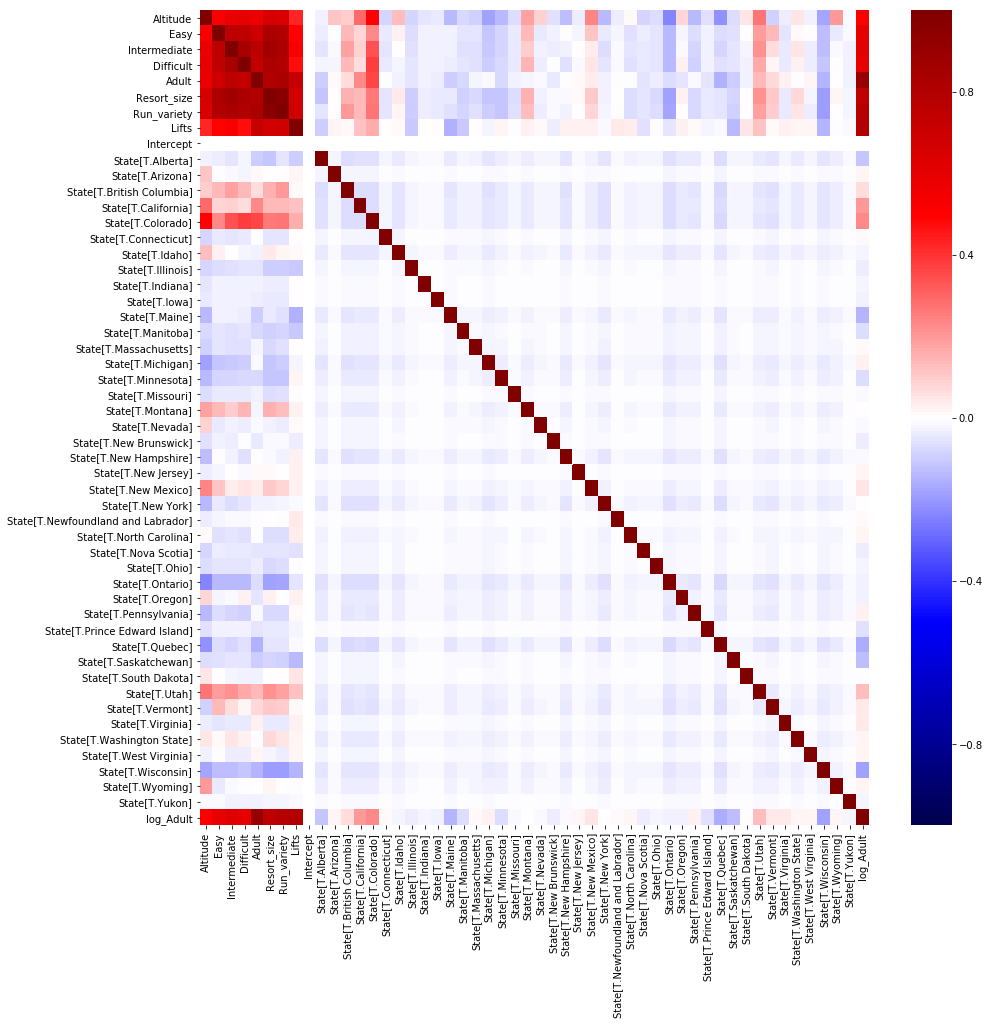

In [307]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(dummified_ski_NA_df_clean1.drop(columns = ['Youth','Child']).corr(), cmap="seismic", vmin=-1, vmax=1, ax = ax)

plt.savefig('init_col_heatmap.svg')

#intuitively: states with more notoriety would have higher pass prices. As expected, CO, UT, CA. WY not in, good deal

In [308]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import KFold
import seaborn as sns
import matplotlib.pyplot as plt

In [314]:
#Splitting into targets and features
X = dummified_ski_NA_df_clean1.drop(columns = ['Adult','Child','Youth','Resort_name','log_Adult'])
y = pd.DataFrame(dummified_ski_NA_df_clean1.Adult)
y_log = pd.DataFrame(dummified_ski_NA_df_clean1.log_Adult)

# this is my straight price train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
y_train = pd.DataFrame(y_train, columns = ['Adult']).reset_index().drop(columns = ['index'])
y_test = pd.DataFrame(y_test, columns = ['Adult']).reset_index().drop(columns = ['index'])
X_train = X_train.reset_index().drop(columns = ['index'])
X_test = X_test.reset_index().drop(columns = ['index'])

In [ ]:
# this is my log price train/test split
# X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size = 0.3)
# y_train = pd.DataFrame(y_train, columns = ['log_Adult']).reset_index().drop(columns = ['index'])
# y_test = pd.DataFrame(y_test, columns = ['log_Adult']).reset_index().drop(columns = ['index'])
# X_train = X_train.reset_index().drop(columns = ['index'])
# X_test = X_test.reset_index().drop(columns = ['index'])
# log gives a low R^2 DONT USE IT

In [44]:
# #normalizing for modeling REVISIT
from sklearn import preprocessing
# X_train_normal = preprocessing.StandardScalar(X_train, axis = 0)
# X_train_normal_stats = X_train.mean(),X_train.std()
# X_train_normal = pd.DataFrame(X_train_normal,columns=X_train.columns)

# y_train_normal = preprocessing.normalize(y_train, axis = 0)
# y_train_normal_stats = y_train.mean(),y_train.std()
# y_train_normal = pd.DataFrame(y_train_normal,columns=y_train.columns)

# X_test_normal = preprocessing.normalize(X_test, axis = 0)
# X_test_normal_stats = X_test.mean(),X_test.std()
# X_test_normal = pd.DataFrame(X_test_normal,columns=X_test.columns)

# y_test_normal = preprocessing.normalize(y_test, axis = 0)
# y_test_normal_stats = y_test.mean(),y_test.std()
# y_test_normal = pd.DataFrame(y_test_normal,columns=y_test.columns)

In [315]:
#initial model with sm
model = sm.OLS(y_train, X_train)
fit = model.fit()
fit.summary()
from sklearn.metrics import r2_score
r2_score(y_test, fit.predict(X_test))

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


0.7641380517795726

In [322]:
#initial model with poly in scikit learn
degree = 1
simple_est = make_pipeline(PolynomialFeatures(degree), ElasticNetCV(l1_ratio = 0.5, cv=5, alphas = [0]))
est = make_pipeline(PolynomialFeatures(degree), ElasticNetCV(l1_ratio = 1, cv=5))
est.fit(X_train.drop(columns = ['Intercept']), y_train)
simple_est.fit(X_train.drop(columns = ['Intercept']), y_train)
simple_est.score(X_test.drop(columns = ['Intercept']), y_test)
est.score(X_test.drop(columns = ['Intercept']), y_test)

# should use degree 1

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause 

0.5392669912418878

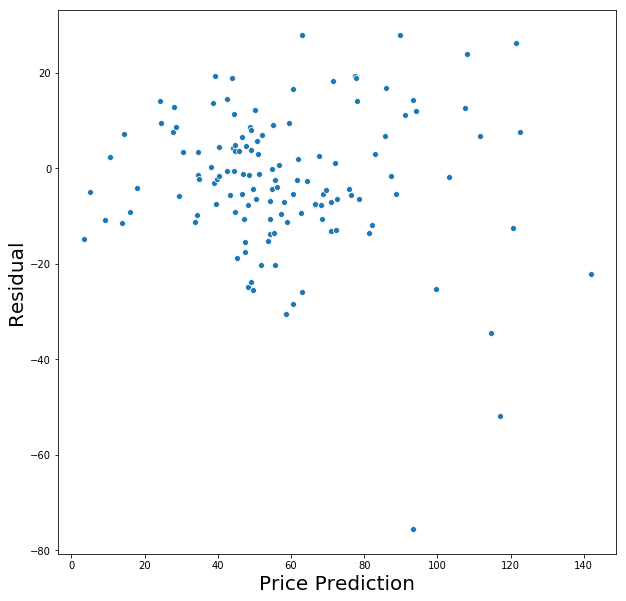

In [323]:
# plot residuals
y_pred = pd.DataFrame(est.predict(X_test.drop(columns = ['Intercept'])), columns = ['Adult_prediction'])
y_overfit = pd.DataFrame(simple_est.predict(X_test.drop(columns = ['Intercept'])), columns = ['Adult_prediction'])

plot_init_pred_df = pd.concat([y_pred,y_test], axis = 1)
plot_init_pred_df['residuals'] = plot_init_pred_df['Adult_prediction'] - plot_init_pred_df['Adult'] 
plot_init_pred_df = plot_init_pred_df.sort_values(by = ['Adult_prediction'])
plot_init_pred_df

overplot_init_pred_df = pd.concat([y_overfit,y_test], axis = 1)
overplot_init_pred_df['residuals'] = overplot_init_pred_df['Adult_prediction'] - overplot_init_pred_df['Adult'] 
overplot_init_pred_df = overplot_init_pred_df.sort_values(by = ['Adult_prediction'])
overplot_init_pred_df

fig, ax = plt.subplots(figsize = [10,10])
ax.set_xlabel('Price Prediction', fontsize = 20)
ax.set_ylabel('Residual', fontsize = 20)
sns.scatterplot(np.array(overplot_init_pred_df['Adult_prediction']), np.array(overplot_init_pred_df['residuals']), ax = ax)

# plt.savefig('initial_residual_degree1.png')

# mse=np.mean((y_test-est.predict(x_test))**2)
# pred_y_normal = pd.DataFrame(est.predict(X_test_normal), columns = ['pred_y_normal'])
# target_y_normal = pd.DataFrame(y_test_normal, columns = ['target_y_normal'])
# comparison = pd.concat([pred_y_normal, target_y_normal], axis = 1)
# comparison['comparison'] = (comparison['pred_y_normal'] - comparison['target_y_normal'])**2
# mse = np.sum(comparison['comparison'])
# mse

In [324]:
# an idea which stats matter

p_value_thresh = 0.2
features_keep = [fit.pvalues.index[i] for i, pvalue in enumerate(fit.pvalues) if pvalue < p_value_thresh]
# X_train_keep = X_train[features_keep]
# X_test_keep = X_test[features_keep]
features_keep = features_keep + ['State[T.Utah]']

features_keep

['Easy',
 'Intermediate',
 'Difficult',
 'Run_variety',
 'Lifts',
 'Intercept',
 'State[T.California]',
 'State[T.Colorado]',
 'State[T.Connecticut]',
 'State[T.Illinois]',
 'State[T.Massachusetts]',
 'State[T.Michigan]',
 'State[T.Montana]',
 'State[T.New Hampshire]',
 'State[T.Ontario]',
 'State[T.Pennsylvania]',
 'State[T.Vermont]',
 'State[T.Virginia]',
 'State[T.West Virginia]',
 'State[T.Wisconsin]',
 'State[T.Utah]']

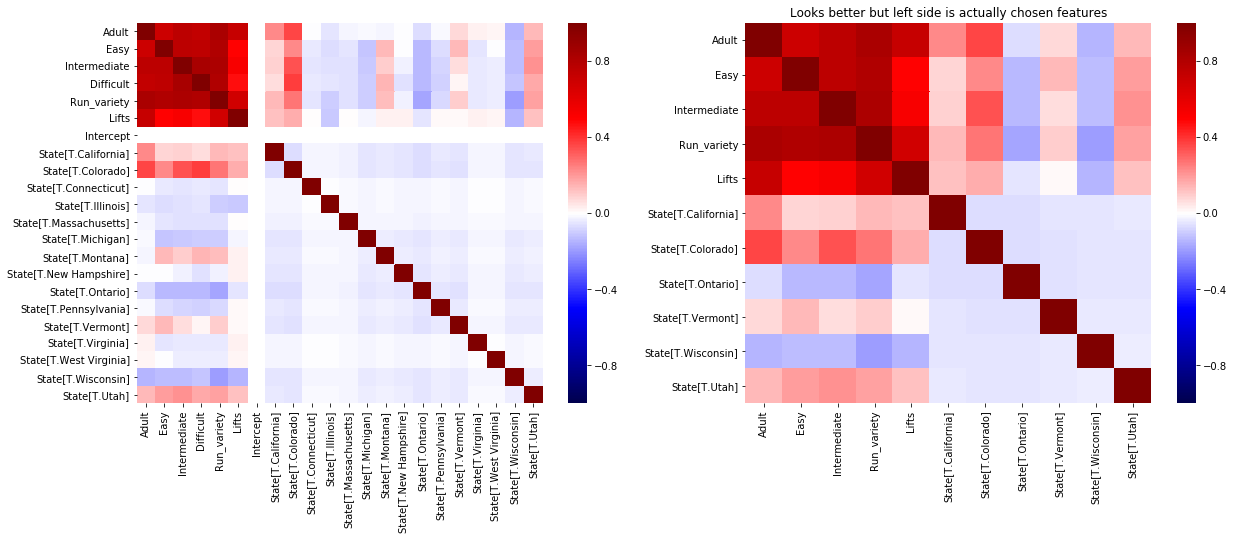

In [326]:
corr_features_keep = ['Adult'] + features_keep
dummified_ski_NA_df_clean1[corr_features_keep].corr()
# dummified_ski_NA_df_clean1[features_keep]
# dummified_ski_NA_df_clean1[features_keep].corr()
fig, ax = plt.subplots(1,2,figsize=(20,7))
ax[1].set_title('Looks better but left side is actually chosen features')
sns.heatmap(dummified_ski_NA_df_clean1[corr_features_keep].corr(), cmap="seismic", vmin=-1, vmax=1, ax = ax[0])
sns.heatmap(dummified_ski_NA_df_clean1[['Adult','Easy','Intermediate','Run_variety', 'Lifts','State[T.California]','State[T.Colorado]', 'State[T.Ontario]', 'State[T.Vermont]', 'State[T.Wisconsin]', 'State[T.Utah]']].corr(), cmap="seismic", vmin=-1, vmax=1, ax = ax[1])

plt.savefig('Init_Corr_Heatmap.png')


In [327]:
total_trail_length = dummified_ski_NA_df_clean1['Easy'] + dummified_ski_NA_df_clean1['Intermediate'] + dummified_ski_NA_df_clean1['Difficult']
easy_ratio = dummified_ski_NA_df_clean1['Easy']/total_trail_length
intermediate_ratio = dummified_ski_NA_df_clean1['Intermediate']/total_trail_length
difficult_ratio = dummified_ski_NA_df_clean1['Difficult']/total_trail_length
fe_ski_NA_df_clean1 = pd.concat([easy_ratio, intermediate_ratio, difficult_ratio, total_trail_length, dummified_ski_NA_df_clean1], axis = 1)
fe_ski_NA_df_clean1.rename(columns = {0: 'Easy_ratio', 1: 'Intermediate_ratio', 2: 'Difficult_ratio', 3: 'Total_trail_length'}, inplace = True)
fe_ski_NA_df_clean1 = fe_ski_NA_df_clean1.drop(columns = ['Easy', 'Intermediate', 'Difficult'])
# make bang column
normalize_resort_size = fe_ski_NA_df_clean1['Resort_size']#.map(lambda x: (x-1)/4)
normalize_run_variety = fe_ski_NA_df_clean1['Run_variety']#.map(lambda x: (x-1)/4)
normalize_lifts = fe_ski_NA_df_clean1['Lifts']#.map(lambda x: (x-1)/4)
bang = (normalize_resort_size + normalize_run_variety)/fe_ski_NA_df_clean1['Adult']
bang = pd.DataFrame(bang, columns = ['bang'])
fe_ski_NA_df_clean1 = pd.concat([bang, fe_ski_NA_df_clean1], axis = 1)
fe_ski_NA_df_clean1 = fe_ski_NA_df_clean1.drop(columns=['log_Adult','Youth','Child','Resort_size','Run_variety'])
fe_ski_NA_df_clean1.sort_values(by = ['bang'], ascending = False).head()

,bang,Easy_ratio,Intermediate_ratio,Difficult_ratio,Total_trail_length,Resort_name,Altitude,Adult,Lifts,Intercept,State[T.Alberta],State[T.Arizona],State[T.British Columbia],State[T.California],State[T.Colorado],State[T.Connecticut],State[T.Idaho],State[T.Illinois],State[T.Indiana],State[T.Iowa],State[T.Maine],State[T.Manitoba],State[T.Massachusetts],State[T.Michigan],State[T.Minnesota],State[T.Missouri],State[T.Montana],State[T.Nevada],State[T.New Brunswick],State[T.New Hampshire],State[T.New Jersey],State[T.New Mexico],State[T.New York],State[T.Newfoundland and Labrador],State[T.North Carolina],State[T.Nova Scotia],State[T.Ohio],State[T.Ontario],State[T.Oregon],State[T.Pennsylvania],State[T.Prince Edward Island],State[T.Quebec],State[T.Saskatchewan],State[T.South Dakota],State[T.Utah],State[T.Vermont],State[T.Virginia],State[T.Washington State],State[T.West Virginia],State[T.Wisconsin],State[T.Wyoming],State[T.Yukon]
159,0.520,0.214,0.786,0.0,1.4,kettlebowl,542.0,5.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
182,0.420,1.000,0.000,0.0,0.5,living-memorial-park-brattleboro,189.0,5.0,1.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
306,0.420,1.000,0.000,0.0,0.5,powderhouse-hill-south-berwick,80.0,5.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
240,0.343,0.625,0.375,0.0,0.8,mount-prospect-lancaster,520.0,7.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152,0.300,0.500,0.500,0.0,0.8,innisfail,955.0,8.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [328]:
fe_ski_NA_df_clean1.sort_values(by=['Resort_name'], ascending=True)

,bang,Easy_ratio,Intermediate_ratio,Difficult_ratio,Total_trail_length,Resort_name,Altitude,Adult,Lifts,Intercept,State[T.Alberta],State[T.Arizona],State[T.British Columbia],State[T.California],State[T.Colorado],State[T.Connecticut],State[T.Idaho],State[T.Illinois],State[T.Indiana],State[T.Iowa],State[T.Maine],State[T.Manitoba],State[T.Massachusetts],State[T.Michigan],State[T.Minnesota],State[T.Missouri],State[T.Montana],State[T.Nevada],State[T.New Brunswick],State[T.New Hampshire],State[T.New Jersey],State[T.New Mexico],State[T.New York],State[T.Newfoundland and Labrador],State[T.North Carolina],State[T.Nova Scotia],State[T.Ohio],State[T.Ontario],State[T.Oregon],State[T.Pennsylvania],State[T.Prince Edward Island],State[T.Quebec],State[T.Saskatchewan],State[T.South Dakota],State[T.Utah],State[T.Vermont],State[T.Virginia],State[T.Washington State],State[T.West Virginia],State[T.Wisconsin],State[T.Wyoming],State[T.Yukon]
0,0.128,0.294,0.397,0.309,68.0,49-degrees-north-mountain-resort,1760.0,58.00,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.072,0.375,0.375,0.250,8.0,afton-alps,387.0,58.00,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.118,0.667,0.333,0.000,1.5,alice-hill-park-pembroke,210.0,22.00,1.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.056,0.052,0.240,0.708,9.6,alpental,1670.0,79.00,3.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.050,0.250,0.400,0.350,100.0,alpine-meadows,2632.0,159.00,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.076,0.250,0.500,0.250,8.0,alpine-mountain-ski-snow-tubing-center,351.0,55.00,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.064,0.500,0.300,0.200,20.0,alpine-ski-club-collingwood,460.0,80.00,3.4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.070,0.267,0.400,0.333,1.5,alpine-valley-cleveland,457.0,43.00,2.9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.071,0.375,0.375,0.250,4.0,alpine-valley-resort-elkhorn,415.0,48.00,3.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.087,0.250,0.400,0.350,116.0,alta,3215.0,104.00,3.7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [329]:
#search for matches for each entry in the snow_drop_df vs. ski_NA_df_clean1
import re
counter = 0
all_matches = []
for find in range(0,286):
    flag = 0
    resort_name = snow_dropna_df['Name'].iloc[find]
    search_string = re.sub('[^a-z0-9]','',resort_name.lower())[1:7]
    matches = ()
    for check in range(0,434):
        check_string = re.sub('[^a-z0-9]','',fe_ski_NA_df_clean1['Resort_name'][check].lower())
        pattern = re.search(search_string, check_string)
        if pattern:
            flag = 1
            matches = matches + (check, fe_ski_NA_df_clean1['Resort_name'][check])
    if flag: counter += 1
    all_matches.append(matches)
all_matches

[(16, 'arapahoe-basin'),
 (),
 (33, 'beaver-creek'),
 (52, 'breckenridge'),
 (86, 'copper-mountain'),
 (113, 'eldora-mountain'),
 (146, 'howelsen-hill-steamboat-springs'),
 (160, 'keystone'),
 (189, 'loveland'),
 (210, 'monarch'),
 (305, 'powderhorn', 306, 'powderhouse-hill-south-berwick'),
 (308, 'purgatory-durango'),
 (),
 (),
 (146, 'howelsen-hill-steamboat-springs', 369, 'steamboat'),
 (385, 'sunlight-mountain'),
 (392, 'telluride'),
 (152,
  'innisfail',
  183,
  'lonesome-pine-trails-fort-kent',
  186,
  'lost-trail-powder-mountain',
  351,
  'snow-trails',
  402,
  'vail',
  424,
  'whitetail-ridge-fort-mccoy'),
 (429, 'winter-park-kewaunee-county', 430, 'winter-park-resort'),
 (432, 'wolf-creek'),
 (158, 'kendall-mountain-silverton'),
 (),
 (34, 'beaver-mountain'),
 (54, 'brian-head'),
 (56, 'brighton', 257, 'mt-brighton'),
 (97, 'deer-valley'),
 (432, 'wolf-creek'),
 (293, 'park-city'),
 (354, 'snowbasin'),
 (355, 'snowbird'),
 (362, 'solitude'),
 (383, 'sundance'),
 (109, 'ea

In [330]:
# manual fixing
print(len(all_matches))
all_matches[10] = all_matches[10][0:2]
all_matches[14] = all_matches[14][2:4]
all_matches[17] = all_matches[17][8:10]
all_matches[18] = all_matches[18][2:]
all_matches[24] = all_matches[24][0:2]
all_matches[36] = all_matches[36][0:2]
all_matches[42] = all_matches[42][0:2]
all_matches[57] = all_matches[57][0:2]
all_matches[73] = all_matches[73][2:4]
all_matches[79] = all_matches[79][138:144]
all_matches[80] = all_matches[80][2:4]
all_matches[86] = all_matches[86][0:2]
all_matches[116] = all_matches[116][2:4]
all_matches[118] = ()
all_matches[119] = all_matches[119][2:4]
all_matches[149] = ()
all_matches[152] = all_matches[152][0:2]
all_matches[153] = all_matches[153][0:2]
all_matches[158] = all_matches[158][2:4]
all_matches[163] = all_matches[163][0:2]
all_matches[179] = all_matches[179][0:2]
all_matches[187] = all_matches[187][0:2]
all_matches[193] = all_matches[193][2:4]
all_matches[215] = all_matches[215][0:2]
all_matches[223] = all_matches[223][4:6]
all_matches[234] = all_matches[234][0:2]
all_matches[242] = all_matches[242][2:4]
all_matches[255] = all_matches[255][0:2]
all_matches[271] = all_matches[271][2:4]
all_matches[277] = all_matches[277][2:4]
all_matches[278] = all_matches[278][4:6]

for i, match in enumerate(all_matches):
    if len(match) > 2:
        print(i, snow_dropna_df['Name'].iloc[i], match)

all_matches

286
79 Mountain High (248, 'mountain-high-east', 249, 'mountain-high-north', 250, 'mountain-high-west')


[(16, 'arapahoe-basin'),
 (),
 (33, 'beaver-creek'),
 (52, 'breckenridge'),
 (86, 'copper-mountain'),
 (113, 'eldora-mountain'),
 (146, 'howelsen-hill-steamboat-springs'),
 (160, 'keystone'),
 (189, 'loveland'),
 (210, 'monarch'),
 (305, 'powderhorn'),
 (308, 'purgatory-durango'),
 (),
 (),
 (369, 'steamboat'),
 (385, 'sunlight-mountain'),
 (392, 'telluride'),
 (402, 'vail'),
 (430, 'winter-park-resort'),
 (432, 'wolf-creek'),
 (158, 'kendall-mountain-silverton'),
 (),
 (34, 'beaver-mountain'),
 (54, 'brian-head'),
 (56, 'brighton'),
 (97, 'deer-valley'),
 (432, 'wolf-creek'),
 (293, 'park-city'),
 (354, 'snowbasin'),
 (355, 'snowbird'),
 (362, 'solitude'),
 (383, 'sundance'),
 (109, 'eagle-point'),
 (348, 'snow-king-mountain-jackson'),
 (124, 'grand-targhee'),
 (),
 (153, 'jackson-hole'),
 (359, 'snowy-range'),
 (421, 'white-pine-pinedale'),
 (345, 'sleeping-giant'),
 (206, 'meadowlark-ski-lodge'),
 (423, 'whitefish-mountain-resort'),
 (55, 'bridger-bowl-bozeman'),
 (102, 'discovery-s

In [331]:
combined_list = []
for i, matches in enumerate(all_matches):
    if len(matches) == 0:
        pass
    elif len(matches) == 2:
        ski_df_slice = fe_ski_NA_df_clean1.iloc[matches[0]]
        snow_df_slice = snow_dropna_df.iloc[i]
        concat_df_slice = pd.concat([ski_df_slice, snow_df_slice])
        combined_list.append(concat_df_slice)
    elif len(matches) >= 3:
        for j in range(0,len(matches)//2):
            pass

In [361]:
combined_df = pd.concat(combined_list, axis = 1)
combined_df = combined_df.T.drop(columns = ['State', 'Name'])
combined_df_rn = combined_df.Resort_name
combined_df = combined_df.drop(columns = ['Resort_name']).applymap(lambda x: float(x))
combined_df = pd.concat([combined_df_rn, combined_df], axis = 1)
combined_df

,Resort_name,bang,Easy_ratio,Intermediate_ratio,Difficult_ratio,Total_trail_length,Altitude,Adult,Lifts,Intercept,State[T.Alberta],State[T.Arizona],State[T.British Columbia],State[T.California],State[T.Colorado],State[T.Connecticut],State[T.Idaho],State[T.Illinois],State[T.Indiana],State[T.Iowa],State[T.Maine],State[T.Manitoba],State[T.Massachusetts],State[T.Michigan],State[T.Minnesota],State[T.Missouri],State[T.Montana],State[T.Nevada],State[T.New Brunswick],State[T.New Hampshire],State[T.New Jersey],State[T.New Mexico],State[T.New York],State[T.Newfoundland and Labrador],State[T.North Carolina],State[T.Nova Scotia],State[T.Ohio],State[T.Ontario],State[T.Oregon],State[T.Pennsylvania],State[T.Prince Edward Island],State[T.Quebec],State[T.Saskatchewan],State[T.South Dakota],State[T.Utah],State[T.Vermont],State[T.Virginia],State[T.Washington State],State[T.West Virginia],State[T.Wisconsin],State[T.Wyoming],State[T.Yukon],Average Base Depth,Average Summit Depth,Biggest Snowfall,Max Base Depth,Max Summit Depth,Total Snowfall,Total Snowfall Days
0,arapahoe-basin,0.080,0.381,0.238,0.381,105.0,3790.0,100.00,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.800,46.600,15.800,76.600,76.600,321.800,92.200
1,beaver-creek,0.048,0.190,0.430,0.380,150.0,3488.0,189.00,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.000,43.000,15.600,72.200,72.200,235.000,58.400
2,breckenridge,0.055,0.183,0.392,0.425,153.0,3914.0,164.00,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.600,52.600,17.400,87.400,87.400,309.600,70.200
3,copper-mountain,0.061,0.238,0.317,0.444,126.0,3767.0,150.00,3.7,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.600,55.600,15.800,74.800,133.600,254.400,67.800
4,eldora-mountain,0.069,0.212,0.500,0.288,52.0,3292.0,94.00,3.2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.000,41.200,14.800,55.400,55.800,225.600,53.800
5,howelsen-hill-steamboat-springs,0.132,0.425,0.375,0.200,4.0,2175.0,25.00,2.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.800,28.000,11.800,43.200,44.000,112.800,38.200
6,keystone,0.057,0.185,0.481,0.333,135.0,3651.0,159.00,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.200,42.200,15.200,69.000,69.000,225.600,64.800
7,loveland,0.093,0.129,0.409,0.462,93.0,3871.0,75.00,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.200,48.800,17.000,108.800,81.800,351.600,84.600
8,monarch,0.077,0.161,0.452,0.387,31.0,3630.0,74.00,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.600,58.600,17.800,87.000,87.000,246.800,57.800
9,powderhorn,0.086,0.132,0.395,0.474,38.0,3000.0,71.00,3.6,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.600,41.200,14.000,62.800,64.800,166.400,36.400


In [333]:
columns = list(combined_df.columns.values)
columns = ['Adult','Easy_ratio',
 'Intermediate_ratio',
 'Total_trail_length',
 'Altitude',
 'Lifts',
 'Total Snowfall']
combined_df.columns.values

array(['Resort_name', 'bang', 'Easy_ratio', 'Intermediate_ratio',
       'Difficult_ratio', 'Total_trail_length', 'Altitude', 'Adult',
       'Lifts', 'Intercept', 'State[T.Alberta]', 'State[T.Arizona]',
       'State[T.British Columbia]', 'State[T.California]',
       'State[T.Colorado]', 'State[T.Connecticut]', 'State[T.Idaho]',
       'State[T.Illinois]', 'State[T.Indiana]', 'State[T.Iowa]',
       'State[T.Maine]', 'State[T.Manitoba]', 'State[T.Massachusetts]',
       'State[T.Michigan]', 'State[T.Minnesota]', 'State[T.Missouri]',
       'State[T.Montana]', 'State[T.Nevada]', 'State[T.New Brunswick]',
       'State[T.New Hampshire]', 'State[T.New Jersey]',
       'State[T.New Mexico]', 'State[T.New York]',
       'State[T.Newfoundland and Labrador]', 'State[T.North Carolina]',
       'State[T.Nova Scotia]', 'State[T.Ohio]', 'State[T.Ontario]',
       'State[T.Oregon]', 'State[T.Pennsylvania]',
       'State[T.Prince Edward Island]', 'State[T.Quebec]',
       'State[T.Saskatchewan]'

In [350]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 0 to 200
Data columns (total 59 columns):
Resort_name                           202 non-null object
bang                                  202 non-null float64
Easy_ratio                            202 non-null float64
Intermediate_ratio                    202 non-null float64
Difficult_ratio                       202 non-null float64
Total_trail_length                    202 non-null float64
Altitude                              202 non-null float64
Adult                                 202 non-null float64
Lifts                                 202 non-null float64
Intercept                             202 non-null float64
State[T.Alberta]                      202 non-null float64
State[T.Arizona]                      202 non-null float64
State[T.British Columbia]             202 non-null float64
State[T.California]                   202 non-null float64
State[T.Colorado]                     202 non-null float64
State[T.Con

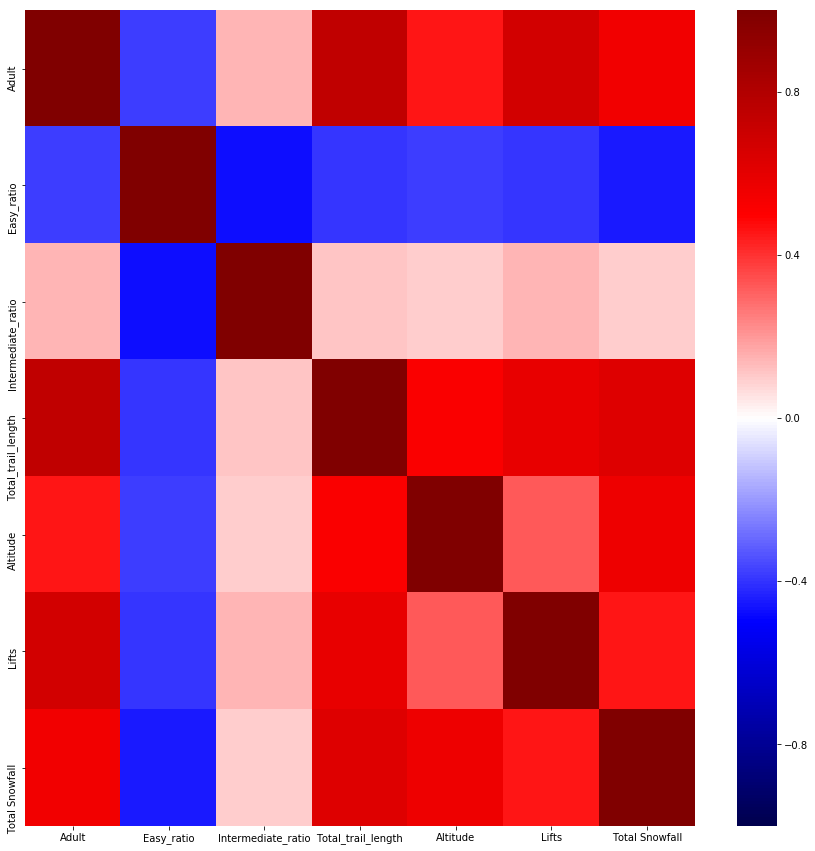

In [233]:
# columns = list(combined_df.columns.values)
columns = ['Adult','Easy_ratio',
 'Intermediate_ratio',
 'Total_trail_length',
 'Altitude',
 'Lifts',
 'Total Snowfall']

# combined_df.drop(columns = ['Resort_name']).corr()
fig, ax = plt.subplots(figsize = [15,15])
sns.heatmap(combined_df[columns].corr(), cmap="seismic", vmin=-1, vmax=1, ax = ax)

In [351]:
#Splitting into targets and features
X = combined_df.drop(columns = ['bang','Adult','Resort_name'])
y = pd.DataFrame(combined_df.Adult)
# y_log = pd.DataFrame(dummified_ski_NA_df_clean1.log_Adult)

# this is my straight price train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35)
y_train = pd.DataFrame(y_train, columns = ['Adult']).reset_index().drop(columns = ['index'])
y_test = pd.DataFrame(y_test, columns = ['Adult']).reset_index().drop(columns = ['index'])
X_train = X_train.reset_index().drop(columns = ['index'])
X_test = X_test.reset_index().drop(columns = ['index'])
X_train.head()

,Easy_ratio,Intermediate_ratio,Difficult_ratio,Total_trail_length,Altitude,Lifts,Intercept,State[T.Alberta],State[T.Arizona],State[T.British Columbia],State[T.California],State[T.Colorado],State[T.Connecticut],State[T.Idaho],State[T.Illinois],State[T.Indiana],State[T.Iowa],State[T.Maine],State[T.Manitoba],State[T.Massachusetts],State[T.Michigan],State[T.Minnesota],State[T.Missouri],State[T.Montana],State[T.Nevada],State[T.New Brunswick],State[T.New Hampshire],State[T.New Jersey],State[T.New Mexico],State[T.New York],State[T.Newfoundland and Labrador],State[T.North Carolina],State[T.Nova Scotia],State[T.Ohio],State[T.Ontario],State[T.Oregon],State[T.Pennsylvania],State[T.Prince Edward Island],State[T.Quebec],State[T.Saskatchewan],State[T.South Dakota],State[T.Utah],State[T.Vermont],State[T.Virginia],State[T.Washington State],State[T.West Virginia],State[T.Wisconsin],State[T.Wyoming],State[T.Yukon],Average Base Depth,Average Summit Depth,Biggest Snowfall,Max Base Depth,Max Summit Depth,Total Snowfall,Total Snowfall Days
0,0.333,0.381,0.286,10.5,411.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,14.2,36.0,12.6,30.2,53.4,52.8,13.6
1,0.333,0.278,0.389,9.0,2380.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,24.8,34.4,14.4,34.4,51.8,117.6,36.8
2,0.294,0.397,0.309,68.0,1760.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,45.2,78.8,15.2,73.4,123.0,205.0,48.2
3,0.200,0.400,0.400,50.0,2003.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87.4,86.0,15.4,333.6,123.6,274.0,73.4
4,0.300,0.500,0.200,50.0,2550.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.8,67.6,14.6,73.6,92.2,187.6,45.6


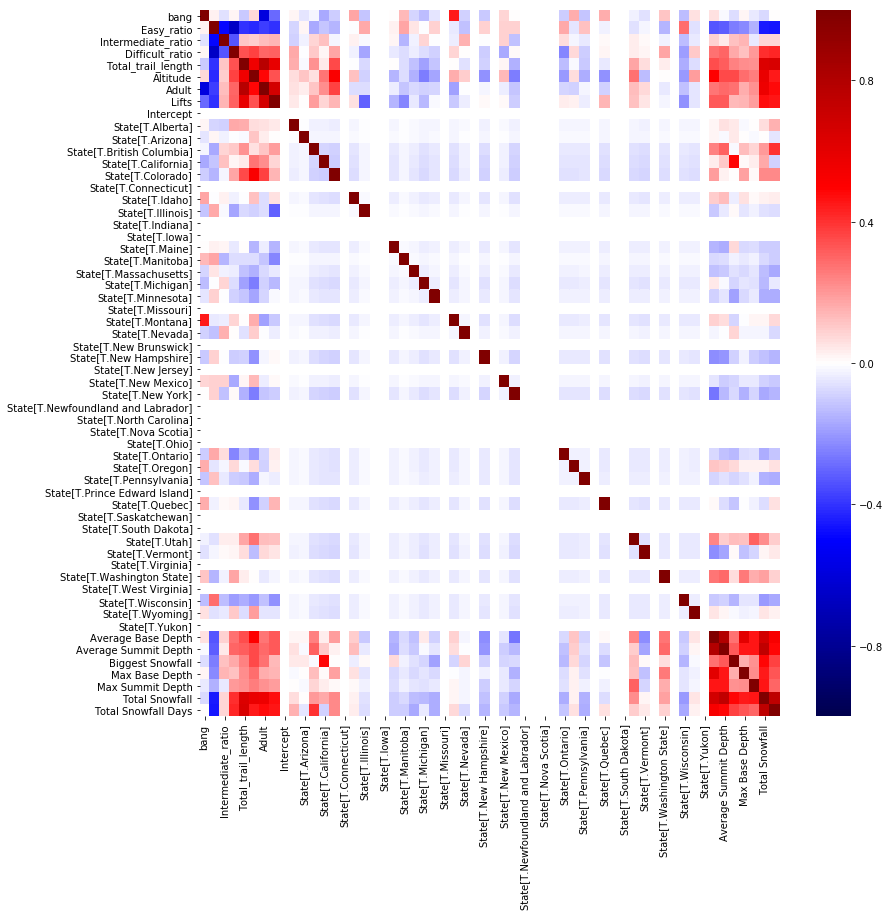

In [348]:
fig, ax = plt.subplots(figsize = [13,13])
sns.heatmap(combined_df.corr(), cmap="seismic", vmin=-1, vmax=1, ax = ax)

In [362]:
model = sm.OLS(y_train, X_train)#.drop(columns = ['Difficult_ratio']))
fit = model.fit()
fit.summary()

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Adult   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     9.491
Date:                Sun, 14 Oct 2018   Prob (F-statistic):           1.41e-18
Time:                        01:09:00   Log-Likelihood:                -541.50
No. Observations:                 131   AIC:                             1155.
Df Residuals:                      95   BIC:                             1259.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Easy_ratio                           -17.3928     13.665     -1.273      0.206     -44.522       9.736
Intermediate_ratio                    -3.2609     12.558     -0.260      0.796     -28.191      21.669
Difficult_ratio                       -6.9172     13.460     -0.514      0.609     -33.639      19.805
Total_trail_length                     0.3890      0.073      5.312      0.000       0.244       0.534
Altitude                               0.0086      0.007      1.199      0.234      -0.006       0.023
Lifts                                 21.3618      4.802      4.448      0.000      11.829      30.895
Intercept                            -27.5709     15.302     -1.802      0.075     -57.950       2.808
State[T.Alberta]                    4.763e-14   1.05e-11      0.005      0.996   -2.07e-11    2.08e-11
State[T.Arizona]                       7.1180     31.071      0.229      0.819     -54.566      68.802
State[T.British Columbia]             -9.7408     18.003     -0.541      0.590     -45.481      26.000
State[T.California]                   13.7145     20.578      0.666      0.507     -27.139      54.568
State[T.Colorado]                      2.4840     23.550      0.105      0.916     -44.268      49.236
State[T.Connecticut]                8.172e-13   2.68e-12      0.305      0.761   -4.51e-12    6.14e-12
State[T.Idaho]                       -23.8226     19.086     -1.248      0.215     -61.713      14.068
State[T.Illinois]                   8.765e-13    1.2e-12      0.732      0.466    -1.5e-12    3.25e-12
State[T.Indiana]                   -1.512e-12   5.23e-12     -0.289      0.773   -1.19e-11    8.88e-12
State[T.Iowa]                      -2.546e-13   9.86e-13     -0.258      0.797   -2.21e-12     1.7e-12
State[T.Maine]                        17.2791     17.713      0.976      0.332     -17.886      52.444
State[T.Manitoba]                  -3.246e-14   7.77e-14     -0.418      0.677   -1.87e-13    1.22e-13
State[T.Massachusetts]                14.9451     17.435      0.857      0.394     -19.669      49.559
State[T.Michigan]                     25.4050     17.040      1.491      0.139      -8.424      59.234
State[T.Minnesota]                     8.4957     18.298      0.464      0.643     -27.831      44.822
State[T.Missouri]                   3.788e-15   1.49e-14      0.255      0.799   -2.57e-14    3.33e-14
State[T.Montana]                     -21.4140     20.626     -1.038      0.302     -62.361      19.533
State[T.Nevada]                        4.7032     24.032      0.196      0.845     -43.006      52.412
State[T.New Brunswick]             -2.471e-14   1.68e-14     -1.471      0.145   -5.81e-14    8.65e-15
State[T.New Hampshire]                17.0359     16.698      1.020      0.310     -16.114      

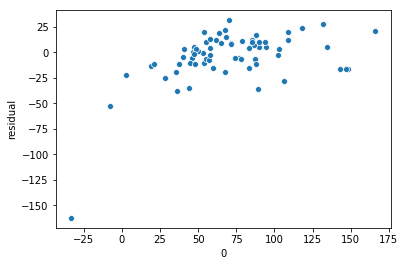

In [363]:
sm_residual_df = pd.concat([fit.predict(X_test), y_test],axis = 1)
sm_residual_df['residual'] = sm_residual_df[0] - sm_residual_df['Adult']
sns.scatterplot(x = sm_residual_df[0], y = sm_residual_df['residual'])

#condition numbers extremely high indicating high colinearity between features

In [371]:
pvalues = fit.pvalues
pvalues_list = list(fit.pvalues.index)
fe = [pvalues_list[i] for i,p in enumerate(pvalues) if p < 0.3]

['Easy_ratio',
 'Total_trail_length',
 'Altitude',
 'Lifts',
 'Intercept',
 'State[T.Idaho]',
 'State[T.Michigan]',
 'State[T.New Brunswick]',
 'State[T.Nova Scotia]',
 'State[T.Oregon]',
 'State[T.Wisconsin]',
 'Average Summit Depth',
 'Max Summit Depth']

In [372]:
model = sm.OLS(y_train, X_train[fe])
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Adult   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     25.47
Date:                Sun, 14 Oct 2018   Prob (F-statistic):           3.00e-25
Time:                        01:16:54   Log-Likelihood:                -565.39
No. Observations:                 131   AIC:                             1153.
Df Residuals:                     120   BIC:                             1184.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Easy_ratio               -13.5902     16.473     -0.825      0.411     -46.206      19.025
Total_trail_length         0.3585      0.056      6.351      0.000       0.247       0.470
Altitude                   0.0047      0.002      2.501      0.014       0.001       0.008
Lifts                     24.4762      4.190      5.842      0.000      16.181      32.772
Intercept                -22.2118     14.696     -1.511      0.133     -51.308       6.885
State[T.Idaho]           -25.2530      8.752     -2.885      0.005     -42.582      -7.925
State[T.Michigan]         16.3038      8.339      1.955      0.053      -0.208      32.815
State[T.New Brunswick]  5.066e-15   5.63e-15      0.899      0.370   -6.09e-15    1.62e-14
State[T.Nova Scotia]   -1.623e-14   4.47e-15     -3.629      0.000   -2.51e-14   -7.37e-15
State[T.Oregon]          -23.5056     11.576     -2.030      0.045     -46.426      -0.585
State[T.Wisconsin]        15.4611      9.355      1.653      0.101      -3.060      33.983
Average Summit Depth       0.1158      0.116      0.995      0.322      -0.115       0.346
Max Summit Depth          -0.1095      0.052     -2.107      0.037      -0.212      -0.007
==============================================================================
Omnibus:                       13.648   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.758
Skew:                           0.525   Prob(JB):                     3.11e-05
Kurtosis:                       4.643   Cond. No.                     1.14e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.27e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

0.2689972333377788


,Price Prediction,Adult,Residual,% Difference,Resort_name
17,55.237,20.0,35.237,176.184,kendall-mountain-silverton
39,75.371,40.0,35.371,88.427,great-divide
41,65.980,36.0,29.980,83.279,maverick-mountain
40,74.750,42.0,32.750,77.976,lost-trail-powder-mountain
43,92.557,53.0,39.557,74.637,red-lodge-mountain
5,43.255,25.0,18.255,73.020,howelsen-hill-steamboat-springs
34,57.145,34.0,23.145,68.072,sleeping-giant
83,103.210,63.0,40.210,63.825,wenatchee-mission-ridge
38,73.377,46.0,27.377,59.515,discovery-ski-area
22,110.016,70.0,40.016,57.165,wolf-creek


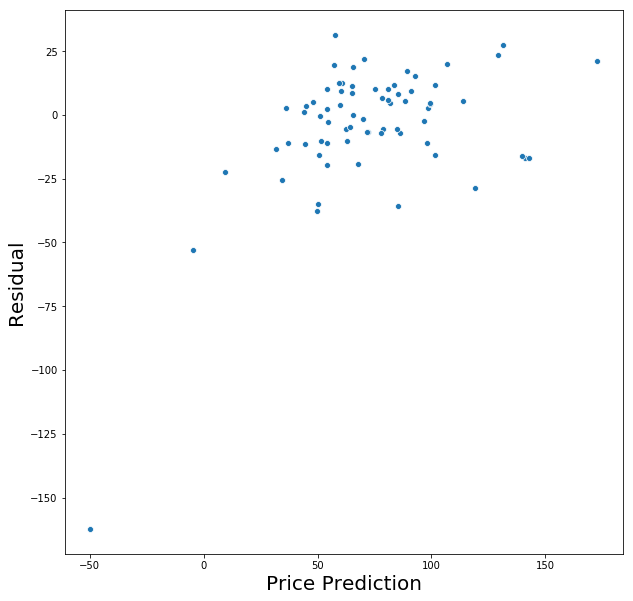

In [374]:
preds = fit.predict(X_test[fe])

from sklearn.metrics import r2_score
print(r2_score(y_test, preds))

fig, ax = plt.subplots(figsize = [10,10])
ax.set_xlabel('Price Prediction', fontsize = 20)
ax.set_ylabel('Residual', fontsize = 20)
new_sm_residual_df = pd.DataFrame(preds)
new_sm_residual_df = pd.concat([new_sm_residual_df, pd.DataFrame(y_test)], axis = 1)
new_sm_residual_df['residual'] = new_sm_residual_df[0] - new_sm_residual_df['Adult']
sns.scatterplot(x = np.array(new_sm_residual_df[0]), y = np.array(sm_residual_df['residual']), ax = ax)

new_sm_residual_df = pd.DataFrame(fit.predict(X[fe]))
new_sm_residual_df = pd.concat([new_sm_residual_df, pd.DataFrame(y)], axis = 1)
new_sm_residual_df['residual'] = new_sm_residual_df[0] - new_sm_residual_df['Adult']

new_sm_residual_df = new_sm_residual_df.rename(columns = {0: 'Price Prediction', 'residual': 'Residual'})
new_sm_residual_df['% Difference'] = new_sm_residual_df['Residual']/new_sm_residual_df['Adult']*100
new_sm_residual_df['Resort_name'] = combined_df['Resort_name']

#final list of good value
new_sm_residual_df.sort_values(by = ['% Difference'],ascending = False).head(12)

In [378]:
from sklearn import metrics
all_degree_scores = []
all_degree_mses=[]
alphas = list(np.logspace(-3,1))
degrees = np.arange(1,3,1)

for degree in degrees:
    mses = []
    scores = []
    for alpha in alphas:
        est = make_pipeline(preprocessing.StandardScaler(), PolynomialFeatures(degree), ElasticNetCV(l1_ratio = 0.7, cv=5, alphas = [alpha]))
        est.fit(X_train.drop(columns = 'Intercept'), y_train)
        scores.append(est.score(X_test.drop(columns = 'Intercept'), y_test))
        y_pred = est.predict(X_test.drop(columns = 'Intercept'))
        mses.append(metrics.mean_squared_error(y_test,y_pred))
    all_degree_scores.append(scores)
    all_degree_mses.append(mses)
    
all_degree_mses

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the numbe

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

[[629.269109673466,
  628.745357540799,
  628.1154712869616,
  627.3587135897677,
  626.4497997857612,
  625.3600782701741,
  624.033069840725,
  622.4384024745316,
  620.5338078552206,
  618.2750913004509,
  615.6057730837042,
  612.4415920879131,
  608.7009311939399,
  604.2979736567634,
  599.1350191510976,
  593.1123608097265,
  586.1258711260629,
  578.0691410203314,
  568.8442309179927,
  558.3593549872887,
  546.5354006315121,
  533.2676191562362,
  518.3049499995865,
  501.940278630815,
  484.95441883283354,
  465.8629447392284,
  445.5014522184866,
  423.7425280780933,
  400.8607705267431,
  377.2838703340081,
  353.6991758404261,
  330.4126989717905,
  308.1638672661057,
  287.6500364332062,
  269.51333451369464,
  255.2789374623692,
  247.8779243696368,
  242.44544420325371,
  238.68820717964329,
  243.95145221989816,
  259.64171351426586,
  279.2392668295319,
  305.04844282188947,
  338.91260238768405,
  376.3981924598523,
  417.5947252113288,
  464.41104430092025,
  518.14

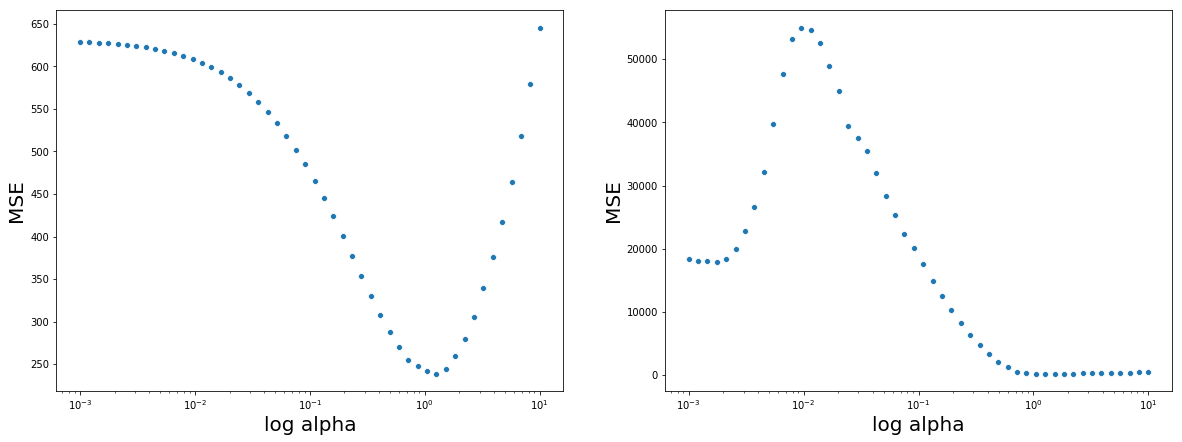

In [379]:
fig, ax = plt.subplots(1,2,figsize = [20,7])
ax[0].set_xscale('log')
ax[0].set_xlabel('log alpha', fontsize = 20)
ax[0].set_ylabel('MSE', fontsize = 20)
ax[1].set_xscale('log')
ax[1].set_xlabel('log alpha', fontsize = 20)
ax[1].set_ylabel('MSE', fontsize = 20)
sns.scatterplot(x = alphas, y = all_degree_mses[0], ax = ax[0])
sns.scatterplot(x = alphas, y = all_degree_mses[1], ax = ax[1])
plt.savefig('compare_degrees0.7.png')

In [380]:
from sklearn import metrics
all_ratio_scores = []
all_ratio_mses=[]
alphas = list(np.logspace(-3,1))
ratios = np.arange(0,1.1,0.1)

for ratio in ratios:
    mses = []
    scores = []
    for alpha in alphas:
        est = make_pipeline(preprocessing.StandardScaler(), PolynomialFeatures(1), ElasticNetCV(l1_ratio = ratio, cv=5, alphas = [alpha]))
        est.fit(X_train, y_train)
        scores.append(est.score(X_test, y_test))
        y_pred = est.predict(X_test)
        mses.append(metrics.mean_squared_error(y_test,y_pred))
    all_ratio_scores.append(scores)
    all_ratio_mses.append(mses)
all_ratio_mses

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/anaconda3/lib/python3

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is dis

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause pr

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause pr

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/anaconda3/lib/python3.6

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause pr

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is dis

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause pr

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause pr

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause pr

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/anaconda3/lib/python3.6

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the numbe

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

[[625.6664847600109,
  624.4275443623166,
  622.9479994739573,
  621.1846673413924,
  619.0879892590923,
  616.6016240573135,
  613.6622425459046,
  610.1996085405848,
  606.1370265369299,
  601.3922245710841,
  595.8787249681186,
  589.5077284996597,
  582.190494749647,
  573.8411575673343,
  564.3798977981527,
  553.7364300350283,
  541.8538524040247,
  528.6930384387142,
  514.2378655497979,
  498.50159903794764,
  481.5346110852651,
  463.4332779696419,
  444.34940167303824,
  424.4989532937211,
  404.16849452790075,
  383.71746444083595,
  363.57473882517894,
  344.2285044041033,
  326.2094534063312,
  310.0684048879716,
  296.35043946925094,
  285.5682311995678,
  278.1772911225598,
  274.5552851816696,
  274.98664910854956,
  279.65275375955343,
  288.62724725345805,
  301.87610094168525,
  319.262182801341,
  340.55445970685923,
  365.4417163876486,
  393.5497654663863,
  424.45980353653283,
  457.7245999336177,
  492.8794282436675,
  529.4464286669104,
  566.9339152771539,
  6

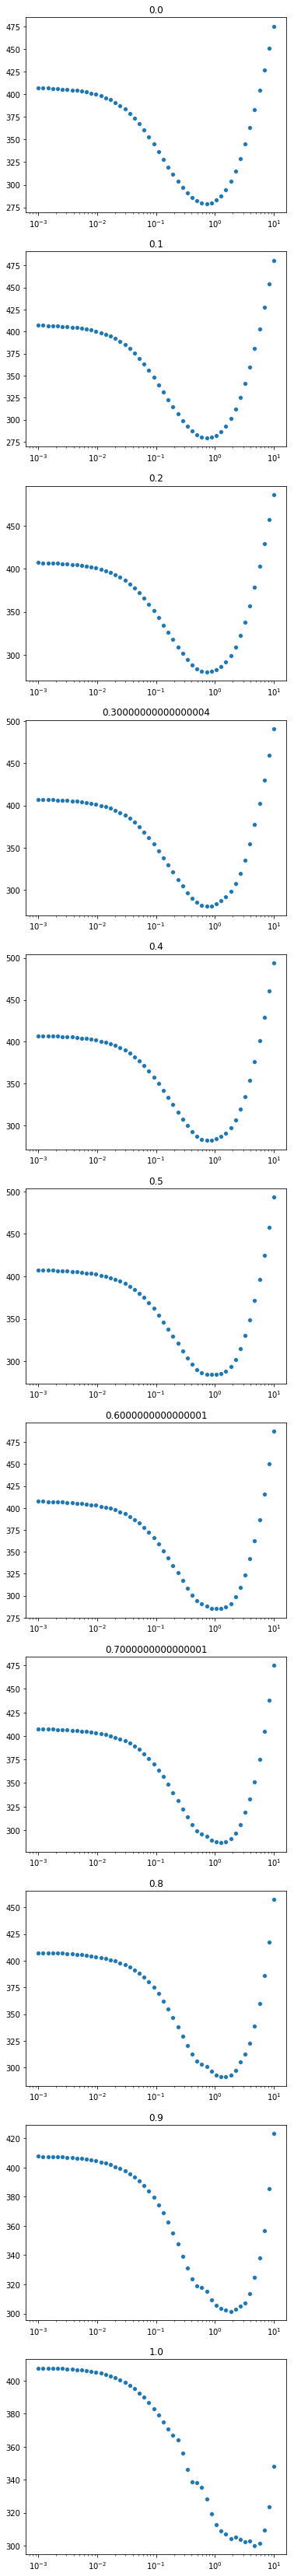

In [65]:
fig, ax = plt.subplots(11,1,figsize = [6,60])
min_ratio_mse = []

for i,ratio in enumerate(ratios):
    ax[i].set_xscale('log')
    ax[i].set_title(str(ratio))
    sns.scatterplot(x = alphas, y = all_ratio_mses[i], ax = ax[i])
    min_ratio_mse.append((np.min(all_ratio_mses[i]), np.argmin(all_ratio_mses[i])))

In [381]:
print(min_ratio_mse)
alphas[min_ratio_mse[0][1]]

#     plt.savefig('compare_degrees0.7.png')

[(279.056528608543, 35), (279.3983981130946, 35), (279.94193932904415, 35), (281.00113999082674, 35), (282.47303741587905, 35), (284.48327065426037, 36), (285.13290977742673, 37), (286.4254070743396, 38), (291.1996607292628, 38), (301.60448170721304, 40), (300.2506251248968, 45)]


0.7196856730011514

In [382]:
est = make_pipeline(preprocessing.StandardScaler(), PolynomialFeatures(1), ElasticNetCV(l1_ratio = 0, cv=5, alphas = [0.7197]))
est.fit(X_train, y_train)
est.score(X_test, y_test)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/anaconda3/lib/python3

0.7265825347020767

0.0007533838370563906

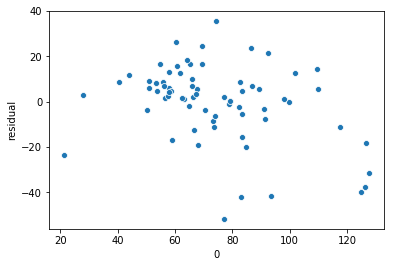

In [383]:
#residual
# pred_y = est.predict(X_test)
# pred_y
# y_test
sklearn_residual_df = pd.concat([pd.Series(est.predict(X_test)), y_test],axis = 1)
sklearn_residual_df['residual'] = sklearn_residual_df[0] - sklearn_residual_df['Adult']
sns.scatterplot(x = sklearn_residual_df[0], y = sklearn_residual_df['residual'])

from scipy import stats
p = stats.normaltest(sklearn_residual_df['residual'])[1]
p
# read online that this is extremely low hurray


In [384]:
print(np.min(all_degree_mses[0]), np.argmin(all_degree_mses[0]))

238.68820717964329 38


In [385]:
est = make_pipeline(preprocessing.StandardScaler(), PolynomialFeatures(1), ElasticNetCV(l1_ratio = 0.5, cv=5, alphas = [alphas[27]]))
est.fit(X_train, y_train)
est.score(X_test, y_test)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6173704342326043

In [617]:
# fig, ax = plt.subplots(1,2,figsize=(20,7))
# sns.heatmap(fe_ski_NA_df_clean1[['Adult','Easy_ratio','Intermediate_ratio','Lifts','Total_trail_length','State[T.California]','State[T.Colorado]', 'State[T.Ontario]', 'State[T.Vermont]', 'State[T.Wisconsin]', 'State[T.Utah]']].corr(), cmap="seismic", vmin=-1, vmax=1, ax = ax[0])
# sns.heatmap(fe_ski_NA_df_clean1[['bang','Easy_ratio','Intermediate_ratio', 'Lifts','Total_trail_length','State[T.California]','State[T.Colorado]', 'State[T.Ontario]', 'State[T.Vermont]', 'State[T.Wisconsin]', 'State[T.Utah]']].corr(), cmap="seismic", vmin=-1, vmax=1, ax = ax[1])

# plt.savefig('fe_corr_heatmap.png')

In [ ]:
# features_further_keep = ['Easy_ratio','Intermediate_ratio', 'Total_trail_length'] + features_keep[4:]
# del features_further_keep[5]
# features_further_keep
# ['Easy_ratio','Intermediate_ratio','Difficult_ratio'] + 
# del features_further_keep[3]
# del features_further_keep[3]
# features_further_keep

# Start of bang analysis that wasn't used in the presentation due to last minute corrections to analysis. I ran out of time to change the bang analysis so I had to make do with what I had

# Just notes I had for my thoughts while thinking about the project.

0. find correlation between features to check for colinearity
1. train/test split
2. Standardized
3. try using regularization, this could go hand in hand with poly regression
4. then do a fit on polynomial regression. also try logging stats that would seem log(features that may take off). and exp (features that should plateau). check fit with cross validation.
5. diagnostic tool to see if overfit or under fit. depending on crossval r and training r.
6. diagnostic tool to see if more data should be used.

1. split data (train/test)
2. standardize/normalize train set
3. cross validation train to optimize hyper parameters like regularization hyper parameters (use ElasticnetCV)
4. fit on train with hypers you found
5. standardize transform test set
6. score model on test set



If time permits, could've gotten more features:
proximity to largest neighboring city
snow park rating
ski village rating

Also if I had more time and money going to a bunch of resorts assigning them grades then fitting a model for ratings would help me determine which resorts are worth going to!
Resorts I've been to:
Whistler 4.7
Heavenly 4
Kirkwood 4
Boyne Highland
Squaw Valley
Treetops

Ski resorts  
Everyone wants: cheap
I want: good snow and has enough non-beginner slopes
good? means average base thickness and high snow days. regress between those two and snow reliability rating?
Friends want: (beginner slopes exist)
Maybe create a formula that balances price, slopes and thickness. With friends: more weight on price. By myself: less weight on price
Really for me it's about having as few bad days as possible while paying less
(Not much regression required)
Also: Can find the relationship between (snow, number of trails other factors, proximity to nearest airport or big city) and price. Regression required, but what problem am I trying to solve?

Could find the correlation between ratings for a season with traffic, snowfall and other factors affecting ratings

Plane tickets  
Plane tickets for two weeks in HK
Problems: When to visit and when to buy? Single trip or round trip. Stop or no stop.

Process:
scrape data and find csvs (selenium and beautifulsoup)
clean with modules then manually clean (patsy)
use linear regression on applicable data series (scikitlearn)
make graphs(seaborn)

In [ ]:
# with open('all_resorts.pkl', 'wb') as picklefile:
#     pickle.dump(resort_dict, picklefile)

In [285]:
#  failed code attempt for parsing the dict with scraped material
# hist_snow_states_avg = hist_snow_states.copy() #make sure this is a deep copy in the future

# for state in hist_snow_states_avg:
# #     print(state)
#     for resort in hist_snow_states_avg[state]:
#         counter = 0
#         for i, stat in enumerate(hist_snow_states_avg[state][resort]):
#             stat_str = stat
#             try:
#                 stat = int(stat.replace('"','').strip())
#             except:
#                 pass
#             if isinstance(stat, str):
#                 counter += 1       
#             else:
#                 stat = stat_str
#                 break
#         avg_stats = [0 for i in range(0, counter)]
#         print(hist_snow_states_avg[state][resort][counter:])
#         for i, stat in enumerate(hist_snow_states_avg[state][resort][counter:]):           
#             int_stat = int(stat.replace('"','').strip())
#             print(int_stat)
#             hist_snow_states_avg[state][resort][i] = int_stat
#             avg_stats[i%counter] += int_stat
# #         map((lambda x: x/counter), avg_stats)
# #         hist_snow_states_copy[state][resort] = hist_snow_states_copy[state][resort][:counter] + avg_stats
#         print(hist_snow_states_avg[state][resort][counter:])
#         break
#     break
# # hist_snow_states_avg['colorado']

# biggest_snowfall = []
# average_summit_depth = []
# max_summit_depth = []
# average_base_depth = []
# max_base_depth = []
# total_snowfall_days = []
# total_snowfall = []

# stat_dict = {'Biggest Snowfall:' : biggest_snowfall, 'Average Summit Depth:' : average_summit_depth, 'Max Summit Depth:' : max_summit_depth, 'Average Base Depth:' : average_base_depth, 'Max Base Depth:' : max_base_depth, 'Total Snowfall Days:' : total_snowfall_days, 'Total Snowfall:' : total_snowfall}

# all_stats = [biggest_snowfall, average_summit_depth, max_summit_depth, average_base_depth, max_base_depth, total_snowfall_days, total_snowfall]

# hist_snow_states_avg = hist_snow_states.copy()

# for state in hist_snow_states_copy:
#     for resort in hist_snow_states_copy[state]:
#         for i, stat in enumerate(hist_snow_states_copy[state][resort]):
#             stat_names = []
#             if isinstance(stat, str):
#                 stat_names.append(stat)                
#             else:
#                 print(stat)
#                 stat_dict[stat_name[i % len(stat_names)]] = stat_dict[stat_name[i % len(stat_names)]] + [stat]
                
# # stat_dict              
                

In [285]:
#  failed code attempt for parsing the dict with scraped material
# hist_snow_states_avg = hist_snow_states.copy() #make sure this is a deep copy in the future

# for state in hist_snow_states_avg:
# #     print(state)
#     for resort in hist_snow_states_avg[state]:
#         counter = 0
#         for i, stat in enumerate(hist_snow_states_avg[state][resort]):
#             stat_str = stat
#             try:
#                 stat = int(stat.replace('"','').strip())
#             except:
#                 pass
#             if isinstance(stat, str):
#                 counter += 1       
#             else:
#                 stat = stat_str
#                 break
#         avg_stats = [0 for i in range(0, counter)]
#         print(hist_snow_states_avg[state][resort][counter:])
#         for i, stat in enumerate(hist_snow_states_avg[state][resort][counter:]):           
#             int_stat = int(stat.replace('"','').strip())
#             print(int_stat)
#             hist_snow_states_avg[state][resort][i] = int_stat
#             avg_stats[i%counter] += int_stat
# #         map((lambda x: x/counter), avg_stats)
# #         hist_snow_states_copy[state][resort] = hist_snow_states_copy[state][resort][:counter] + avg_stats
#         print(hist_snow_states_avg[state][resort][counter:])
#         break
#     break
# # hist_snow_states_avg['colorado']

# biggest_snowfall = []
# average_summit_depth = []
# max_summit_depth = []
# average_base_depth = []
# max_base_depth = []
# total_snowfall_days = []
# total_snowfall = []

# stat_dict = {'Biggest Snowfall:' : biggest_snowfall, 'Average Summit Depth:' : average_summit_depth, 'Max Summit Depth:' : max_summit_depth, 'Average Base Depth:' : average_base_depth, 'Max Base Depth:' : max_base_depth, 'Total Snowfall Days:' : total_snowfall_days, 'Total Snowfall:' : total_snowfall}

# all_stats = [biggest_snowfall, average_summit_depth, max_summit_depth, average_base_depth, max_base_depth, total_snowfall_days, total_snowfall]

# hist_snow_states_avg = hist_snow_states.copy()

# for state in hist_snow_states_copy:
#     for resort in hist_snow_states_copy[state]:
#         for i, stat in enumerate(hist_snow_states_copy[state][resort]):
#             stat_names = []
#             if isinstance(stat, str):
#                 stat_names.append(stat)                
#             else:
#                 print(stat)
#                 stat_dict[stat_name[i % len(stat_names)]] = stat_dict[stat_name[i % len(stat_names)]] + [stat]
                
# # stat_dict              
                